
<h3>objetivo: prever o número de passageiros aéreos no futuro</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# importando layers e models específicos para facil utilização
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
passageiros = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv")

## visualização geral dos dados

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


- observamos que temos uma série temporal

In [4]:
# configurando tamanho da figura e tamanho da fonte globalmente
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['font.size'] = 10

<Axes: xlabel='tempo', ylabel='passageiros'>

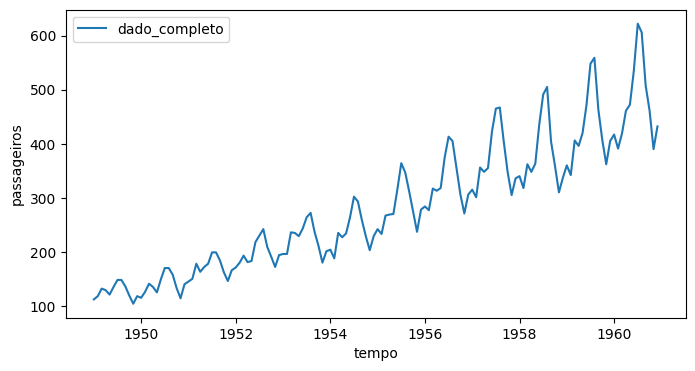

In [5]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros,label='dado_completo')

- percebemos que os dados de tempo estão em escalas diferentes
- a rede neural aprende melhor se os dados estiverem em escalas semelhantes

### escalando dados

- para isso, usaremos o StandartScaler que vem da biblioteca sklearn
- damos o fit nos nossos dados para ele entende-los

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [8]:
dado_escalado = sc.transform(passageiros)
# é uma matriz com duas colunas, uma x e outra y
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

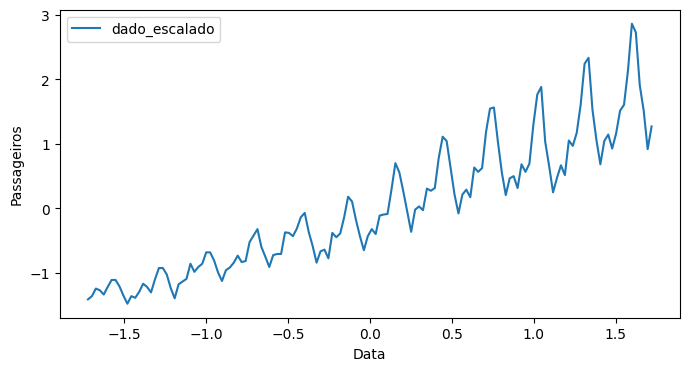

In [9]:
sns.lineplot(x=x,y=y,label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

## separando entre teste e treino

In [10]:
# 90% dos dados serão de treino
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [11]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

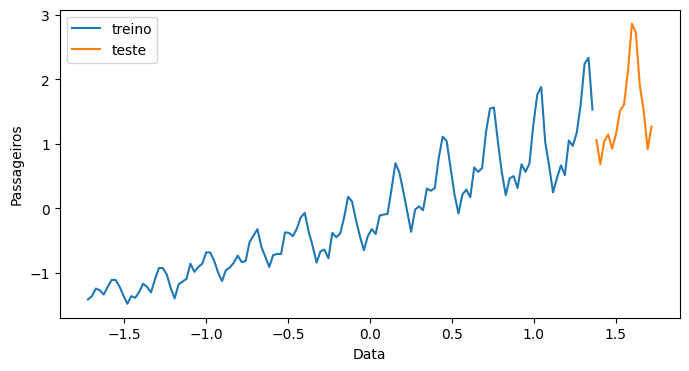

In [12]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')

## regressão linear

### montagem da rede neural

In [13]:
# iniciando rede sequencial com camada única
regressor = Sequential([
    Dense(
        # minha única entrada está se ligando a minha única saída
        1, 

        # uma única entrada -> data
        input_dim=1, 

        # inicializando pesos como 1
        kernel_initializer='Ones', 

        # não usa vies
        use_bias=False,
        
        # não modifica o input
        activation='linear',
    )
])

- usaremos o erro médio quadrado para calcular a perda

In [14]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### treino do modelo

In [16]:
regressor.fit(xtreino,ytreino)


5/5 [==============================] - 1s 3ms/step - loss: 0.1285


In [17]:
y_predict= regressor.predict(xtreino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

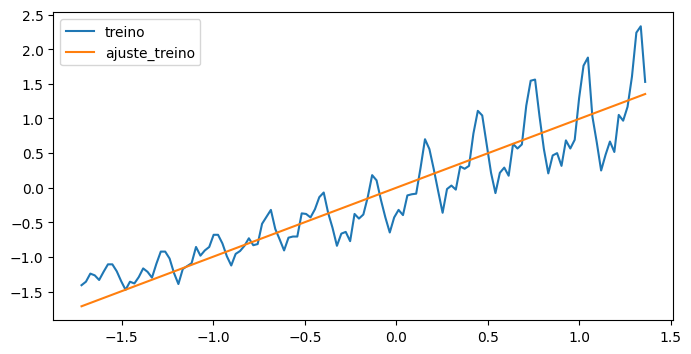

In [18]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

### ajuste de escala

- podemos retornar ao valor antigo de passageiros para conseguir visualizar em escala real

In [19]:
retornando = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=retornando)

In [20]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

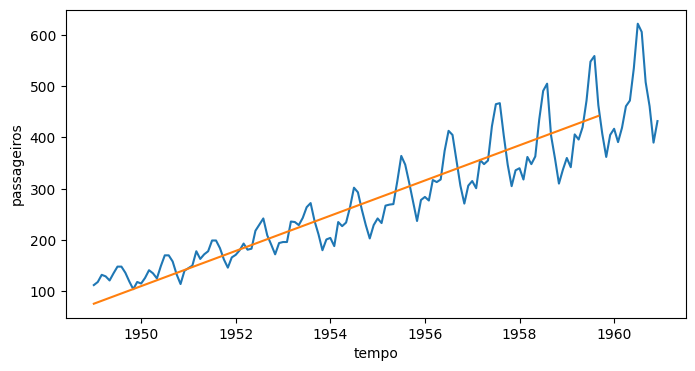

In [21]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)